In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
from matplotlib.animation import FuncAnimation
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
# def cosine(m):
#     d = m.T @ m
#     norm = (m * m).sum(0, keepdims=True) ** .5
#     return d / norm / norm.T

def reduce(pos):
    model = PCA(n_components=2)
    W = model.fit_transform(pos)
    H = model.components_
    return W

### the network

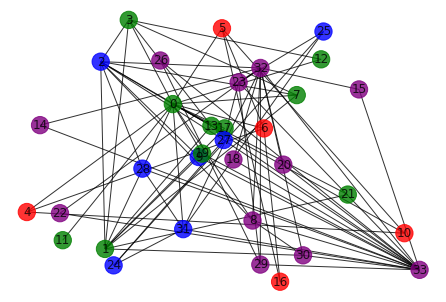

In [3]:
G = nx.karate_club_graph()
np.random.seed(200)

# position
pos = np.random.random((34, 34))
pos2 = reduce(pos)
diction = {}
for i in range(pos2.shape[0]):
    diction[i] = pos2[i]

# the same labeling as the same labeling as https://arxiv.org/abs/1609.02907 and https://arxiv.org/abs/1403.6652
class1 = [4, 6, 5, 10, 16]
class2 = [2, 9, 24, 25, 27, 28, 31]
class3 = [0, 1, 3, 7, 11, 12, 13, 17, 19, 21]
class4 = [8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33]

node_color, Label = [], []
for i in range(34):
    if i in class1:
        node_color.append('red'); Label.append(0)
    elif i in class2:
        node_color.append('blue'); Label.append(1)
    elif i in class3:
        node_color.append('green'); Label.append(2)
    else:
        node_color.append('purple'); Label.append(3)
        
nx.draw(G, diction,
        node_color=node_color,
        alpha = 0.8,
        with_labels=True)

## draw filder vector

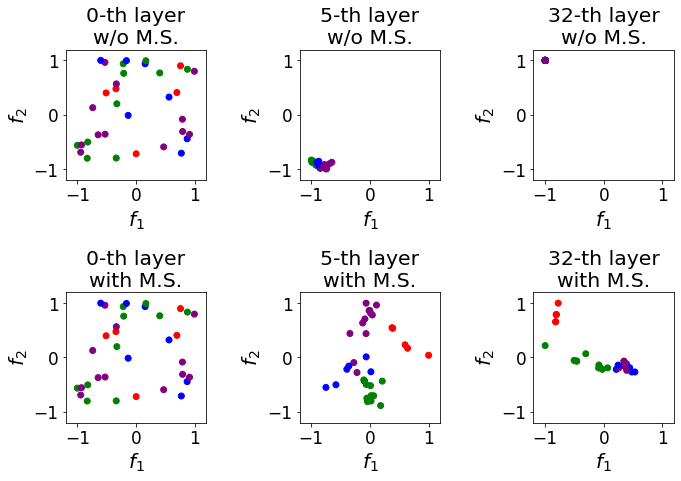

In [4]:
np.random.seed(991)
x = np.random.uniform(-1, 1, (34, 16))
y = x
# x = np.random.random((34,2))
A = nx.adjacency_matrix(G) + np.eye(34)
A = A / A.sum(axis=1)

import matplotlib.pyplot as plt
plt.rc('font', size=17)
plt.figure(figsize=(10, 7))

a = 1
for i in range(1001):
    q = x / np.abs(x).max(axis=0)
    t = y / np.abs(y).max(axis=0)
    if i in [0, 5, 32]:
        plt.subplot(2, 3, a)
        plt.scatter(t[:, 0].T.tolist(), t[:, 1].T.tolist(), color=node_color)
        plt.xlim([-1.2, 1.2])
        plt.ylim([-1.2, 1.2])
        plt.title('{}-th layer\nw/o M.S.'.format(i))
        plt.ylabel('$f_2$', fontsize=20)
        plt.xlabel('$f_1$', fontsize=20)
#         if i == 5:
#             plt.title('without mean-subtraction')

        plt.subplot(2, 3, a+3)
        plt.scatter(q[:, 0].T.tolist(), q[:, 1].T.tolist(), color=node_color)
        plt.xlim([-1.2, 1.2])
        plt.ylim([-1.2, 1.2])
        plt.title('{}-th layer\nwith M.S.'.format(i))
        plt.ylabel('$f_2$', fontsize=20)
        plt.xlabel('$f_1$', fontsize=20)
#         if i == 5:
#             plt.title('with mean-subtraction')
            
        a += 1
    
    temp = np.random.uniform(-1, 1, (16, 16))
    x = np.maximum(0, x)
    x = np.dot(np.dot(A, x), temp)
    x = x - x.mean(axis=0)
    y = np.maximum(0, y)
    y = np.dot(np.dot(A, y), temp)
    
plt.tight_layout()
plt.savefig('karate_demo.pdf')